# 1. Load Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic = pd.read_csv('titanic dataset/train.csv')

# Display first few rows
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Data Cleaning

In [4]:
# Check missing values
print("Missing values in each column:\n")
print(titanic.isnull().sum())


Missing values in each column:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Drop irrelevant columns
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing 'Age' with median
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# Fill missing 'Embarked' with most common value
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

# Verify no missing values
print("\nMissing values after cleaning:\n")
print(titanic.isnull().sum())



Missing values after cleaning:

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


# 3. Exploratory Data Analysis 

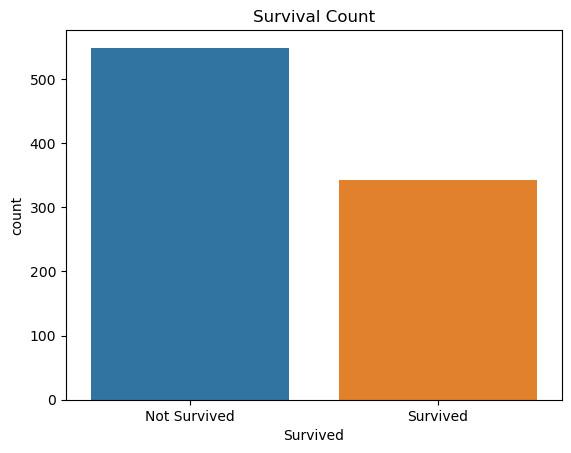

In [6]:
sns.countplot(x='Survived', data=titanic)
plt.title('Survival Count')
plt.xticks([0,1], ['Not Survived', 'Survived'])
plt.show()


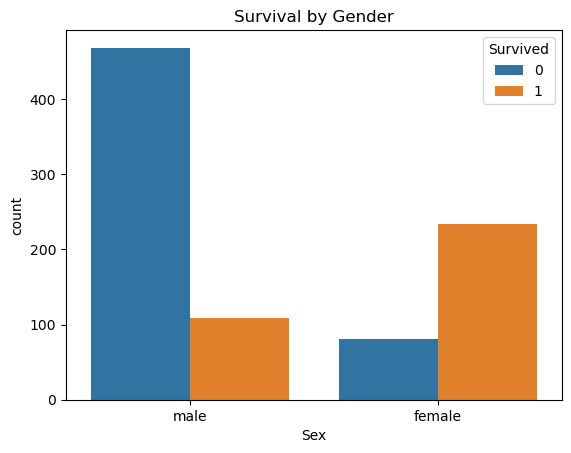

In [9]:
titanic['Survived'] = titanic['Survived'].astype(str)

sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Survival by Gender')
plt.show()

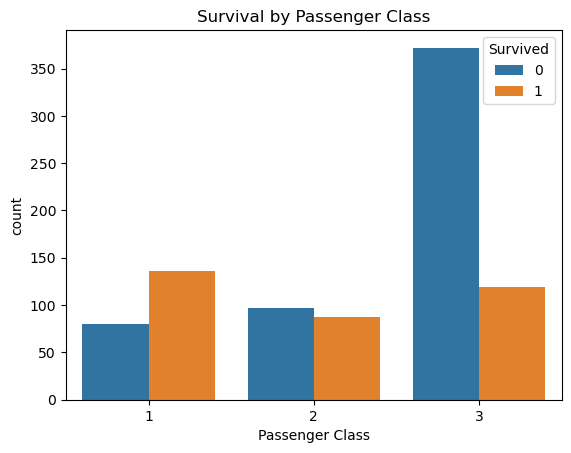

In [10]:
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.show()


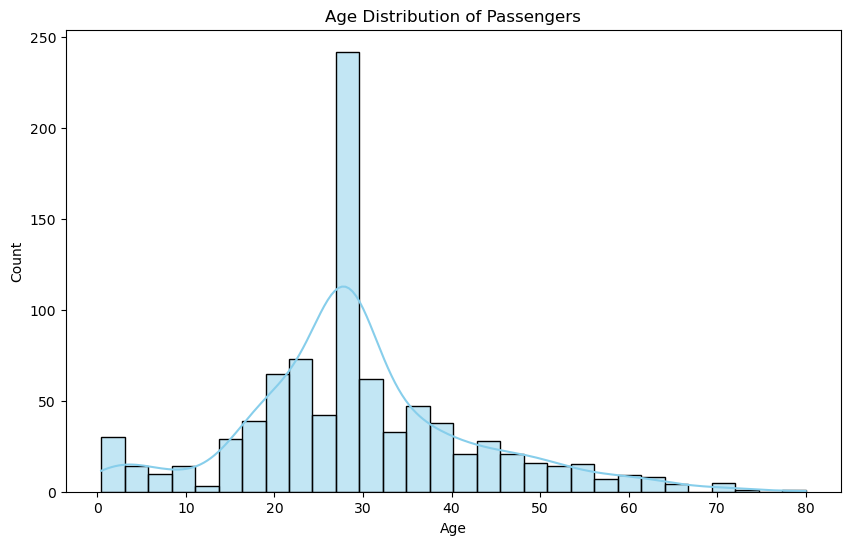

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [25]:
# Fill NaN values in 'Survived' column with a default value (e.g., 'Not Survived')
titanic['Survived'] = titanic['Survived'].fillna(0).astype(int)

# Map to 'Survived' / 'Not Survived'
titanic['Survived'] = titanic['Survived'].map({0: 'Not Survived', 1: 'Survived'})

# Strip any leading/trailing spaces from 'Survived' column
titanic['Survived'] = titanic['Survived'].str.strip()

# Check the unique values again
print(titanic['Survived'].unique())


['Not Survived']


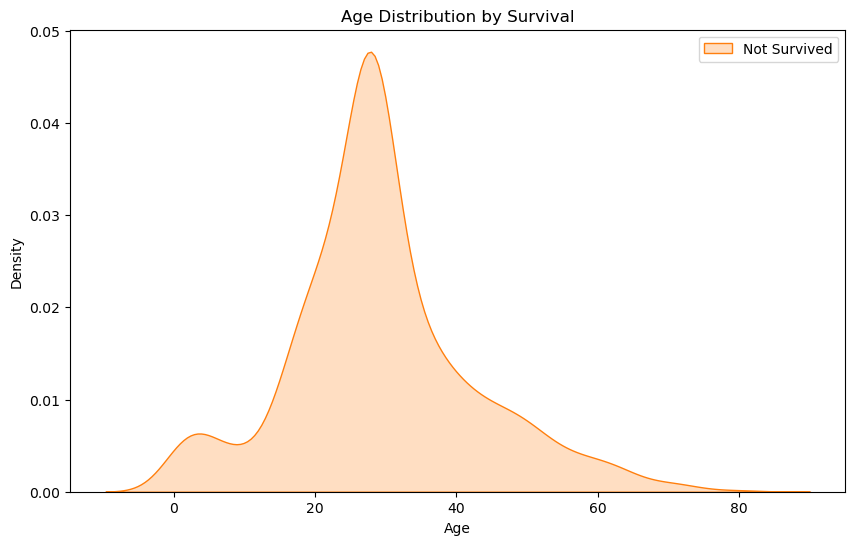

In [26]:
# Drop NaN in 'Age' column
age_data = titanic.dropna(subset=['Age'])

# Plot the KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(data=age_data[age_data['Survived'] == 'Survived']['Age'], label='Survived', fill=True)
sns.kdeplot(data=age_data[age_data['Survived'] == 'Not Survived']['Age'], label='Not Survived', fill=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.legend()
plt.show()


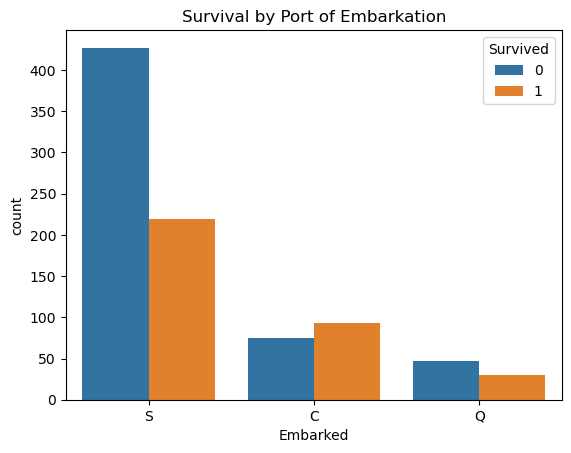

In [13]:
sns.countplot(x='Embarked', hue='Survived', data=titanic)
plt.title('Survival by Port of Embarkation')
plt.show()


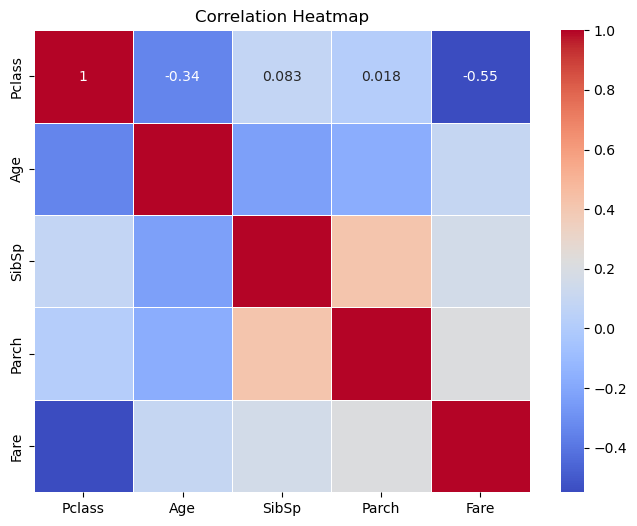

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [15]:
# Summary of all columns
titanic.describe(include='all')


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891,891.000000,891,891.000000,891.000000,891.000000,891.000000,891
unique,2,NaN,2,NaN,NaN,NaN,NaN,3
top,0,NaN,male,NaN,NaN,NaN,NaN,S
freq,549,NaN,577,NaN,NaN,NaN,NaN,646
mean,NaN,2.308642,NaN,29.361582,0.523008,0.381594,32.204208,NaN
std,NaN,0.836071,NaN,13.019697,1.102743,0.806057,49.693429,NaN
min,NaN,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN
50%,NaN,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,NaN,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN
